# Analisis del campo 'banos'

## Imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Configuraciones

### Configuraciones librerias

In [2]:
%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
plt.rcParams['figure.figsize'] = (18, 8)

sns.set(style="whitegrid", font_scale = 2) # seteando tipo de grid en seaborn
                                           # seteando tamanio de ticks label
pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

### Configuraciones plot

In [3]:
TAM_TITULO = 35
TAM_ETIQUETA = 30
COLORES_BARRAS = 'colorblind'

## Funciones auxiliares 

### Funciones estadisticas 

In [22]:
def cuantil_1(serie):
    """
    PRE: Recibe una serie (pandas.Series) .
    POST: Devuelve el cuantil 3 (75%) de la 
    serie recibida .
    """
    return serie.quantile(0.25)

def cuantil_3(serie):
    """
    PRE: Recibe una serie (pandas.Series) .
    POST: Devuelve el cuantil 3 (75%) de la 
    serie recibida .
    """
    return serie.quantile(0.75)

def value_counts_normalize_porcentual(serie):
    """
    PRE: Recibe una serie (pandas.Series).
    POST: Devuelve el porcentaje que 
    representa cada valor en el conjunto 
    total de la serie.
    """
    return serie.value_counts(normalize = True) * 100

### Funciones plot 

In [5]:
def agregar_serie_boxplot(boxplot, serie, color = 'b', desplazamiento_x = 0, desplazamiento_y = 0):
    """
    PRE: Recibe: 
        un boxplot (seaborn.boxplot);
        una serie (pandas.Series) ordenada por 
        fila segun se hayan creado las barras 
        del boxplot para el dataframe de donde 
        proviene la misma;
        un color (string);
        Opcionalmente:
            un desplazamiento en x, y (float)
    POST: Coloca los valores de la serie recibida, 
    en el boxplot, haciendolos coincidir con el 
    xtick que le corresponde a cada valor.
    Los desplazamientos en x e y sirven para 
    terminar de ajustar su posicion.
    Devuelve el boxplot ya configurado.
    """
    posiciones = range(serie.count())
    for pos, xtick in zip(posiciones, boxplot.get_xticks()):
        boxplot.text(
            xtick + desplazamiento_x, 
            serie.get_values()[pos] + desplazamiento_y, 
            serie.get_values()[pos],
            horizontalalignment = 'center', 
            color = color
        )
    return boxplot

## Carga optimizada del set de datos

In [4]:
zona_prop = pd.read_csv('train.csv', \
       dtype = { \
                'id' : np.int32, \
                'tipodepropiedad' : 'category', \
                'provincia' : 'category', \
                'ciudad' : 'category', \
                'antiguedad' : np.float16, \
                'habitaciones' : np.float16, \
                'garages' : np.float16, \
                'banos' : np.float16, \
                'metroscubiertos' : np.float16, \
                'metrostotales' : np.float16, \
                'idzona' : np.float32, \
                'gimnasio' : 'bool', \
                'usosmultiples' : 'bool', \
                'piscina' : 'bool', \
                'escuelascercanas' : 'bool', \
                'centroscomercialescercanos' : 'bool', \
                'precio' : np.float32 \
               },
        parse_dates = ['fecha'],
        date_parser = pd.to_datetime                                
    )

## Banos 

### ¿Que es banos? 

In [6]:
zona_prop['banos'].unique()

array([ 2.,  1.,  3., nan,  4.])

In [8]:
zona_prop['banos'].dtype

dtype('float16')

### ¿Cuantos datos tiene el campo bano limpio? 

In [10]:
cant_banos_nan = zona_prop['banos'].isnull().sum()
cant_banos_nan

26221

### ¿Cuantos datos perdemos si descartamos todos los banos nan? 

In [11]:
cant_banos_nan / zona_prop.shape[0]

0.10925416666666667

Perdemos aprox. el 11 % de los datos del set. 

In [12]:
zona_banos = zona_prop.copy()
zona_banos = zona_banos.dropna(subset = ['banos'])
zona_banos['banos'].isnull().sum()

0

## Banos - Metroscubiertos 

### ¿Que es metros cubiertos?

In [13]:
zona_banos['metroscubiertos'].unique()

array([ 80., 268., 144.,  63.,  95.,  75., 140., 293.,  58., 100., 256.,
       170., 250., 180., 210., 133., 181., 179., 280., 258., 150.,  40.,
        nan,  88., 143., 292., 346., 300., 303., 146.,  78.,  84.,  90.,
       262., 156., 160.,  68.,  98.,  47.,  57., 285.,  79., 175., 340.,
        61., 167., 220., 405.,  46., 350., 355.,  71.,  76., 122., 108.,
       247.,  89., 228., 396., 264., 367., 164., 130.,  39., 161., 216.,
        83., 385., 196., 120., 171., 141., 106., 254.,  86.,  55., 135.,
       277., 110., 115., 177.,  70., 430., 189., 111.,  51., 155.,  65.,
       225., 265.,  60., 102.,  49., 138., 270., 278., 131., 208., 245.,
       269., 154., 125., 295., 211., 188., 230.,  66., 310., 113., 330.,
       226., 233.,  96.,  59.,  54., 152., 360., 195., 173., 234.,  53.,
       201., 193., 117., 351., 145.,  72., 260., 139.,  62., 198., 127.,
       206.,  77., 322., 417., 192.,  64.,  97., 382., 222.,  94., 137.,
       183., 246., 199., 153., 128., 147., 271., 10

### ¿Cuantos metroscubiertos del set restante estan limpios? 

In [17]:
cant_banos_no_nan_metroscubiertos_nan = zona_banos['metroscubiertos'].isnull().sum()
cant_banos_no_nan_metroscubiertos_nan

6604

### ¿Cuantos datos perdemos si descartamos metroscubiertos NaN? 

In [18]:
(cant_banos_nan + cant_banos_no_nan_metroscubiertos_nan) / zona_prop.shape[0]

0.13677083333333334

Perdemos aprox. el 14 % de los datos del set.

In [19]:
zona_banos_metroscubiertos = zona_banos.dropna(subset = ['metroscubiertos'])
zona_banos_metroscubiertos['metroscubiertos'].isnull().sum()

0

### ¿Cual es la distribuciones de metros cubiertos de las propiedades, en Mexico, segun la cantidad de banos? 

In [25]:
banos_agrupados_metroscubiertos_estadisticas = zona_banos_metroscubiertos.groupby(['banos']).agg({'metroscubiertos' : [cuantil_1, 'median', cuantil_3]})
banos_agrupados_metroscubiertos_estadisticas.columns = \
    banos_agrupados_metroscubiertos_estadisticas.columns.get_level_values(0) \
    + '_' + \
    banos_agrupados_metroscubiertos_estadisticas.columns.get_level_values(1)
banos_agrupados_metroscubiertos_estadisticas.reset_index(inplace = True)
banos_agrupados_metroscubiertos_estadisticas

,banos,metroscubiertos_cuantil_1,metroscubiertos_median,metroscubiertos_cuantil_3
0,1.00,60.00,73.00,99.00
1,2.00,106.00,145.00,198.00
2,3.00,180.00,232.00,300.00
3,4.00,237.00,295.00,350.00


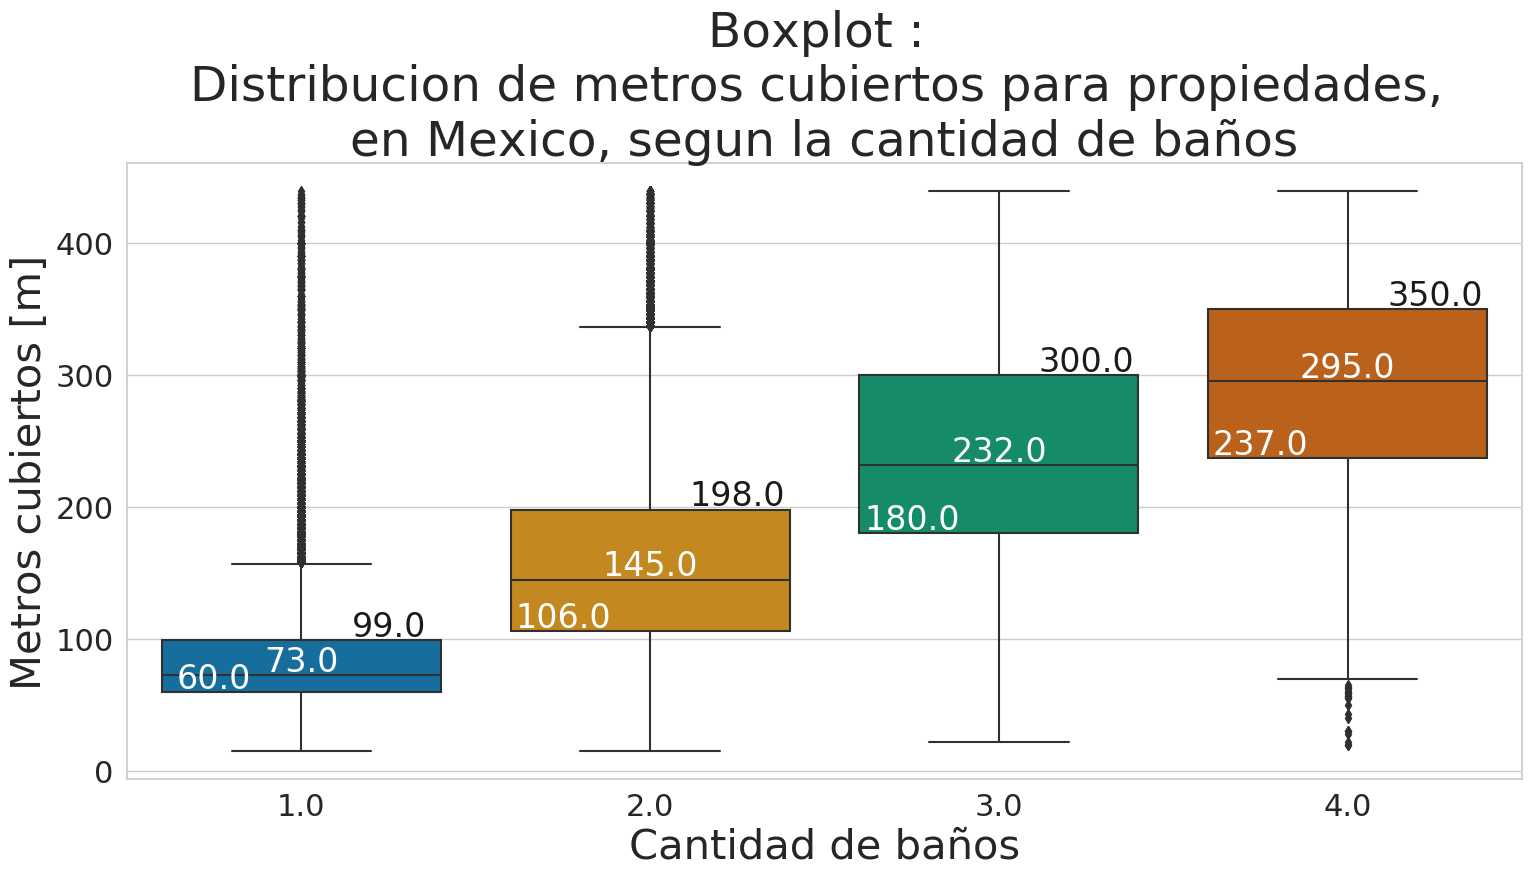

In [36]:
plot_boxplot_banos_metroscubiertos = sns.boxplot(
                                            x = 'banos',
                                            y = 'metroscubiertos',
                                            data = zona_banos_metroscubiertos,
                                            palette = COLORES_BARRAS
                                        )

# Titulos
plot_boxplot_banos_metroscubiertos.set_title(
    'Boxplot : \nDistribucion de metros cubiertos para propiedades, \nen Mexico, segun la cantidad de baños',
    fontsize = TAM_TITULO
)
plot_boxplot_banos_metroscubiertos.set_xlabel('Cantidad de baños', fontsize = TAM_ETIQUETA)
plot_boxplot_banos_metroscubiertos.set_ylabel('Metros cubiertos [m]', fontsize = TAM_ETIQUETA)

# Agrego cuantiles y medianas
agregar_serie_boxplot(
    plot_boxplot_banos_metroscubiertos,
    banos_agrupados_metroscubiertos_estadisticas['metroscubiertos_cuantil_1'],
    'w',
    -0.25, 3
)

agregar_serie_boxplot(
    plot_boxplot_banos_metroscubiertos,
    banos_agrupados_metroscubiertos_estadisticas['metroscubiertos_median'],
    'w',
    0, 3
)

agregar_serie_boxplot(
    plot_boxplot_banos_metroscubiertos,
    banos_agrupados_metroscubiertos_estadisticas['metroscubiertos_cuantil_3'],
    'k',
    0.25, 3
)

plt.show()